In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs

In [70]:
set_fontsize(14)

# Render plots in LaTeX
render_in_latex()

In [71]:
entity_name = "sketchy-opts"
project_name1 = "taxi_full_krr"
project_name2 = "taxi_inducing_krr"

In [72]:
runs_full_krr = get_project_runs(entity_name, project_name1)
runs_inducing_krr = get_project_runs(entity_name, project_name2)

In [73]:
# criteria1 = {
#     "optimizer": lambda run: run.config["opt"] in ["skotch", "askotch"]
# }
criteria1 = {
    "optimizer": lambda run: run.config["opt"] in ["askotch"]
}
criteria2 = {
    "optimizer": lambda run: run.config["opt"] in ["pcg"],
    "m": lambda run: run.config["m"] == 10000,
    "precision": lambda run: run.config["precision"] == "float64",
}
criteria3 = {
    "optimizer": lambda run: run.config["opt"] in ["sketchysaga"],
    "rho": lambda run: run.config["precond_params"] is not None and run.config["precond_params"]["rho"] == 3e6,
    "precision": lambda run: run.config["precision"] == "float64",
}

hparams_to_label = {
    "askotch": ["b", "r"],
    "skotch": ["b", "r"],
    "pcg": ["precond"],
    "sketchysaga": ["r"],
}

In [74]:
c_runs3 = filter_runs(runs_inducing_krr, criteria3)

In [75]:
c_runs1 = filter_runs(runs_full_krr, criteria1)
c_runs2 = filter_runs(runs_inducing_krr, criteria2)
c_runs3 = filter_runs(runs_inducing_krr, criteria3)

print(f"Found {len(c_runs1)} runs")
print(f"Found {len(c_runs2)} runs")
print(f"Found {len(c_runs3)} runs")

all_runs = c_runs1 + c_runs2 + c_runs3

Found 4 runs
Found 1 runs
Found 1 runs


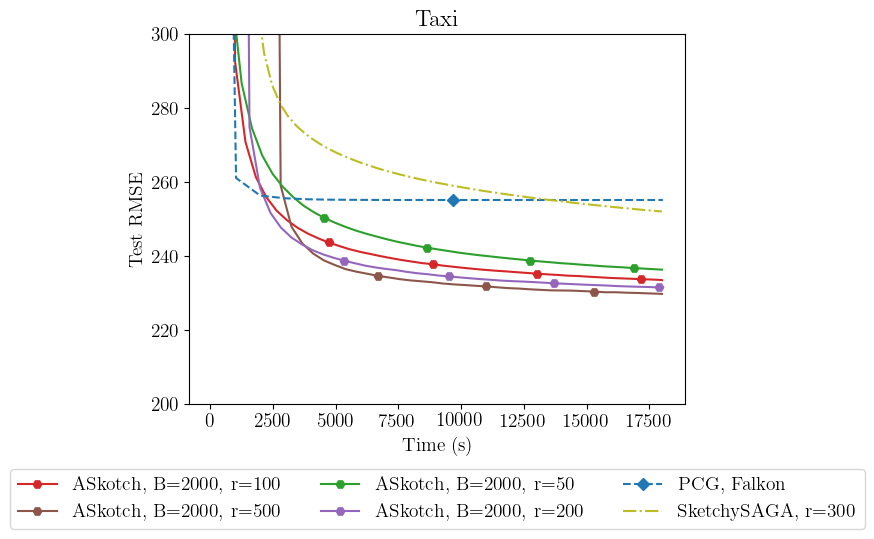

In [76]:
plot_runs(all_runs, hparams_to_label, "test_rmse", "time", [200, 300], "Taxi")

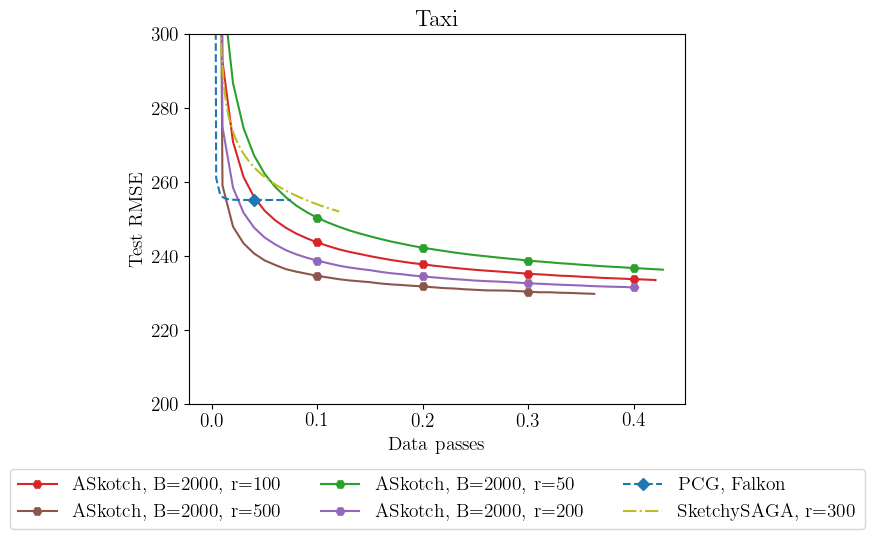

In [77]:
plot_runs(all_runs, hparams_to_label, "test_rmse", "datapasses", [200, 300], "Taxi")